In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
variables = {}

df = pd.read_csv('fluid_io.csv')
df = df.set_index(['subject_id', 'hadm_id', 'icustay_id'])
df = df.query('fluid_net_input_ml.notnull()')
df = df.filter(['fluid_net_input_ml'])
variables["Fluid Net Input Orders (mL/day)"] = np.array(df.values).flatten()

df = pd.read_csv('chloride.csv')
df = df.set_index(['subject_id', 'hadm_id', 'icustay_id'])
df = df.filter(['chloride_input_meq'])
df = df.query('chloride_input_meq.notnull()')
variables["Chloride Input Orders (mEq/day)"] = np.array(df.values).flatten()

df = pd.read_csv('chloride.csv')
df = df.set_index(['subject_id', 'hadm_id', 'icustay_id'])
df = df.filter(['chloride_max'])
df = df.query('chloride_max.notnull()')
variables["Serum Chloride (mEq/L)"] = np.array(df.values).flatten()

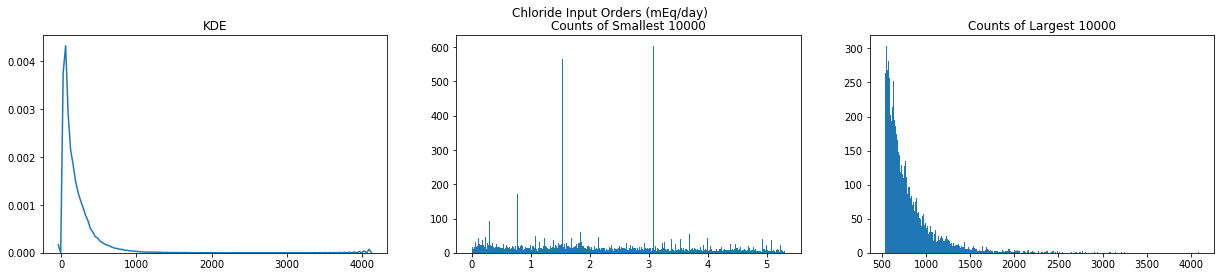

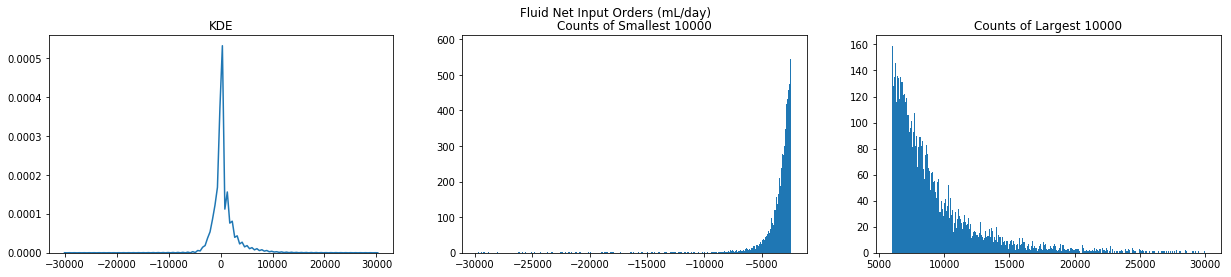

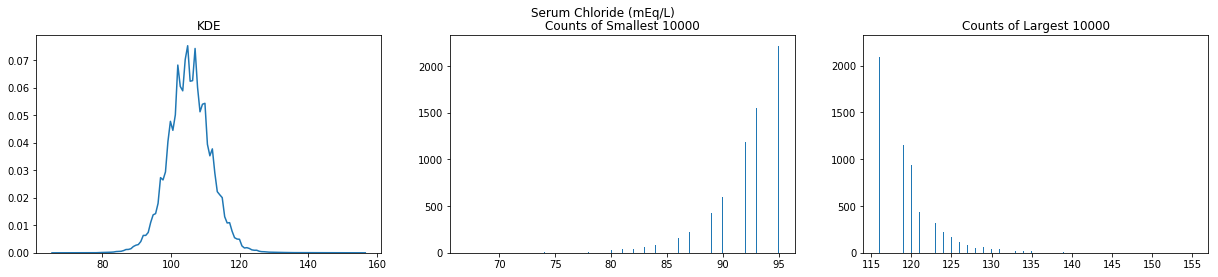

In [3]:
limit = 10000

for name, values in variables.items():
    sorted_values = sorted(values)
    max_values = sorted_values[-limit:]
    min_values = sorted_values[:limit]

    fig, axes = plt.subplots(1, 3, figsize=(21,4))
    fig.suptitle(name)

    sns.distplot(values, hist=False, ax=axes[0])
    axes[0].set_title("KDE")

    axes[1].hist(min_values, bins=limit/20)
    axes[1].set_title("Counts of Smallest %d" % limit)

    axes[2].hist(max_values, bins=limit/20)
    axes[2].set_title("Counts of Largest %d" % limit)